In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("Fraud.csv")

# Data Understanding

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4284592,307,CASH_OUT,36501.25,C1029340128,9957.00,0.00,C1407879386,0.00,36501.25,0,0
322119,16,PAYMENT,7795.23,C2083066389,153962.91,146167.68,M680184733,0.00,0.00,0,0
4131731,302,PAYMENT,11681.58,C311136525,1990.00,0.00,M1527306088,0.00,0.00,0,0
3009566,232,CASH_IN,243756.41,C2011342230,2123.00,245879.41,C1356321513,2156831.14,1913074.73,0,0
4434153,323,PAYMENT,55270.55,C1209634828,55203.00,0.00,M646150991,0.00,0.00,0,0
5005991,353,CASH_OUT,240942.75,C719346470,268817.00,27874.25,C448557561,518594.25,759537.00,0,0
5716850,398,CASH_IN,37953.19,C1041984940,6573449.10,6611402.29,C2053914677,982119.01,944165.83,0,0
3246039,250,CASH_OUT,16093.31,C1164939268,0.00,0.00,C1613223773,16287.33,32380.64,0,0
3947283,286,PAYMENT,25364.21,C423795335,18579.00,0.00,M1600291509,0.00,0.00,0,0
1544726,154,PAYMENT,30076.01,C1920745359,161107.32,131031.32,M865834623,0.00,0.00,0,0


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6362620 entries, 0 to 6362619

Data columns (total 11 columns):

 #   Column          Dtype  

---  ------          -----  

 0   step            int64  

 1   type            object 

 2   amount          float64

 3   nameOrig        object 

 4   oldbalanceOrg   float64

 5   newbalanceOrig  float64

 6   nameDest        object 

 7   oldbalanceDest  float64

 8   newbalanceDest  float64

 9   isFraud         int64  

 10  isFlaggedFraud  int64  

dtypes: float64(5), int64(3), object(3)

memory usage: 534.0+ MB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

The Dataset does not contain missing/null values in any column. 

# Data Cleaning

In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


After observation of describe function the step, nameOrig, nameDest columns doesn't seems to provide the valuable input, So removing those would not varry the desired output. (Assuming)

In [11]:
data.drop(columns= ["step", "nameOrig", "nameDest"], inplace=True)

In [12]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [13]:
data["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [15]:
data["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
data["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

# Exploratory Data Analysis

In [17]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6362620 entries, 0 to 6362619

Data columns (total 8 columns):

 #   Column          Dtype  

---  ------          -----  

 0   type            object 

 1   amount          float64

 2   oldbalanceOrg   float64

 3   newbalanceOrig  float64

 4   oldbalanceDest  float64

 5   newbalanceDest  float64

 6   isFraud         int64  

 7   isFlaggedFraud  int64  

dtypes: float64(5), int64(2), object(1)

memory usage: 388.3+ MB


Univariant Analysis

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

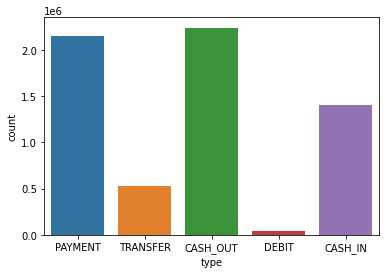

In [19]:
# Bar PLot

sns.countplot(data["type"])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

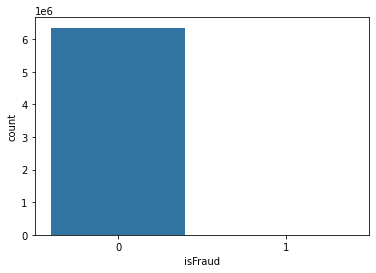

In [20]:
sns.countplot(data["isFraud"])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

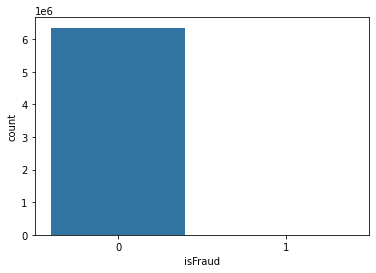

In [21]:
sns.countplot(data["isFraud"])

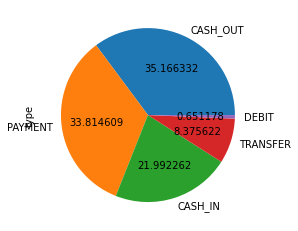

In [22]:
# Pie Chart

plt.show(data["type"].value_counts().plot(kind="pie", autopct="%2f"))

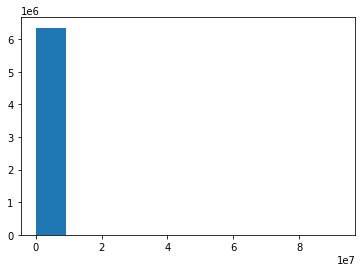

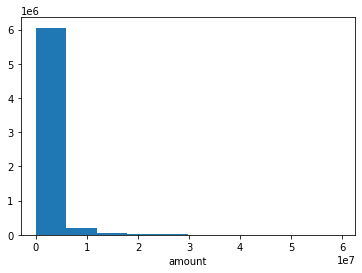

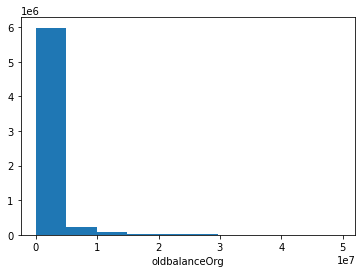

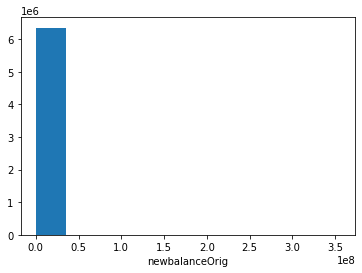

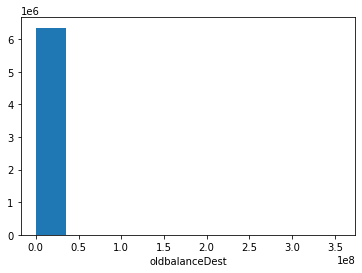

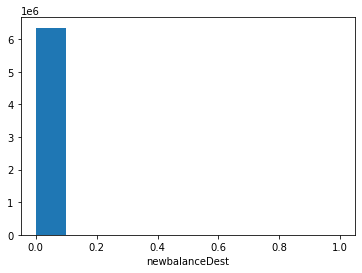

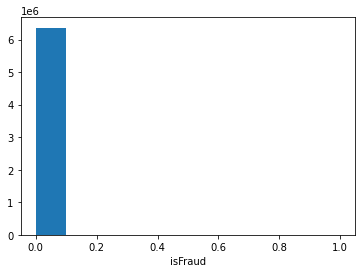

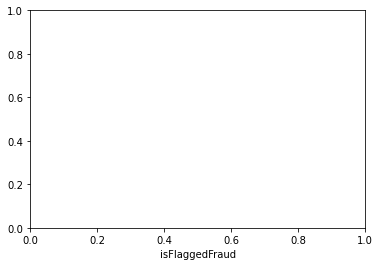

In [23]:
# Histogram

for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


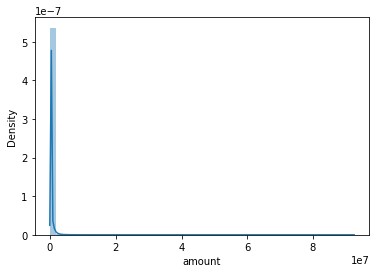

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


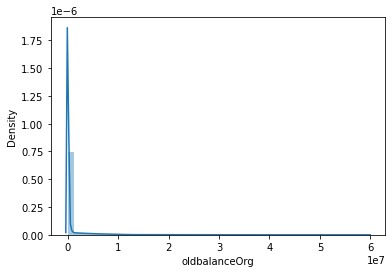

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


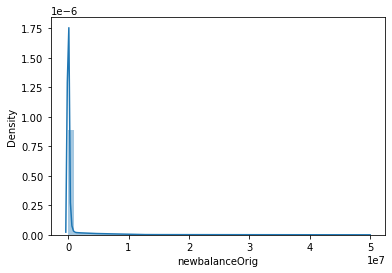

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


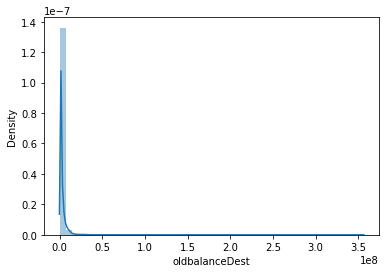

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


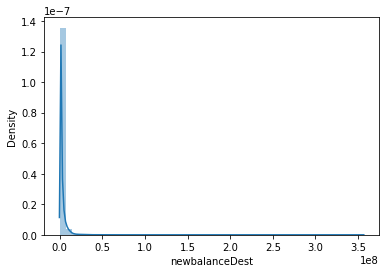

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


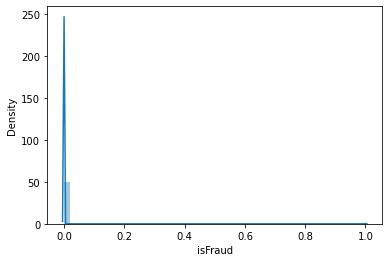

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


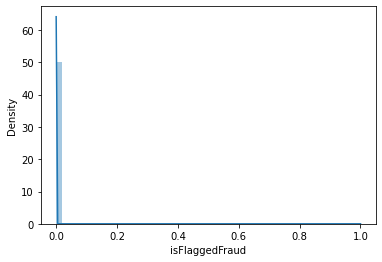

In [24]:
# Distplot

for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


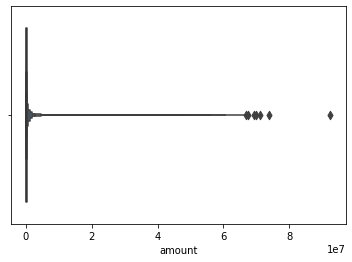

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


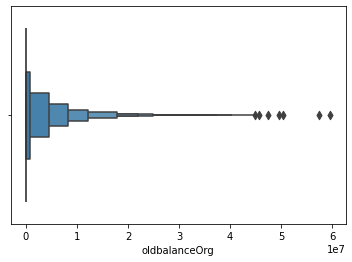

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


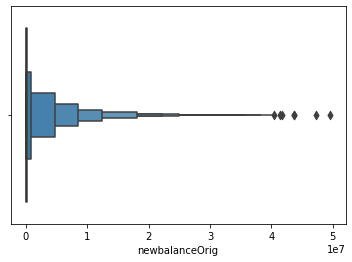

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


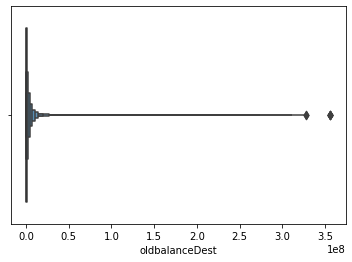

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


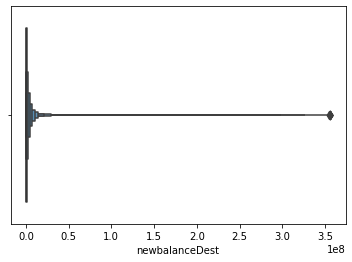

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


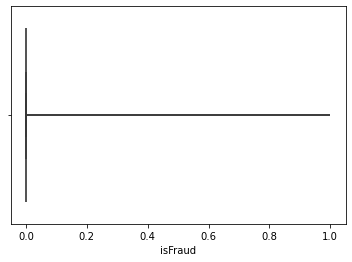

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


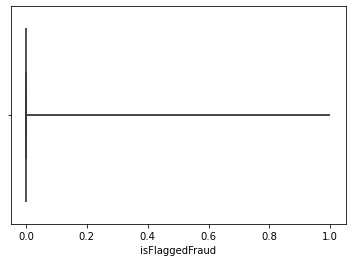

In [25]:
# BoxenPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))

Bivariant Analysis

In [26]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


Numerical - Categorical

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


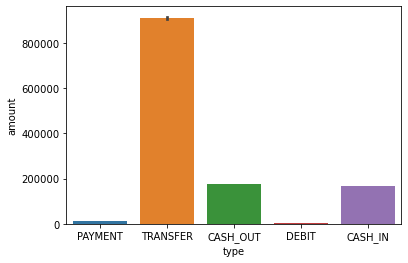

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


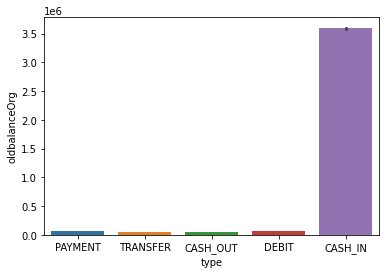

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


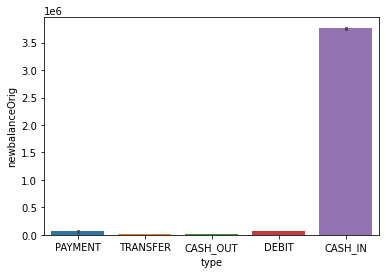

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


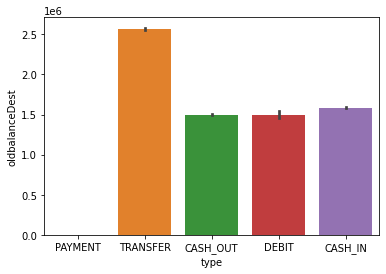

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


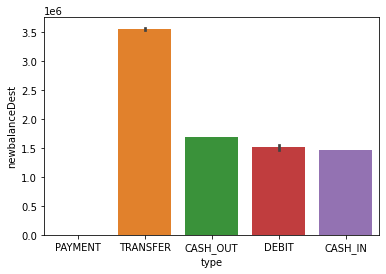

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


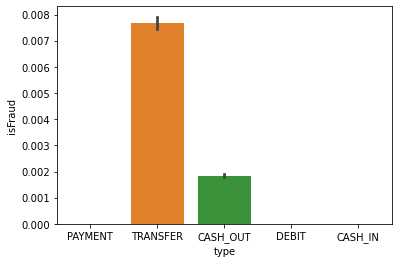

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


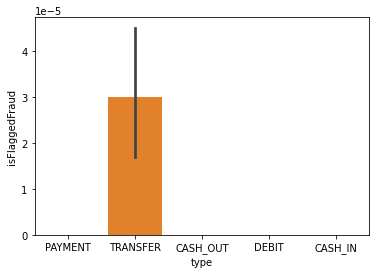

In [27]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["type"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


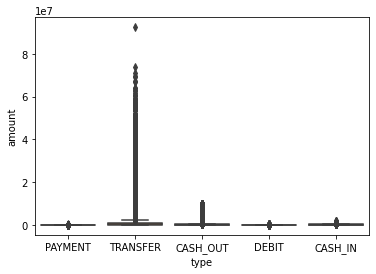

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


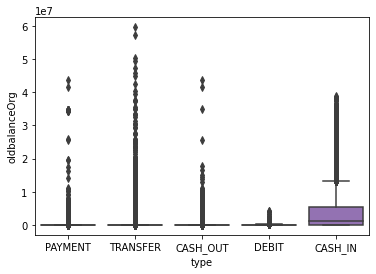

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


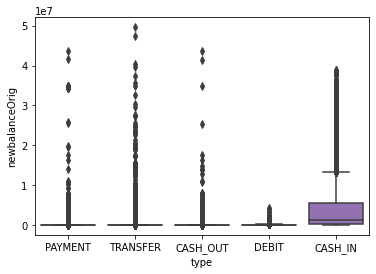

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


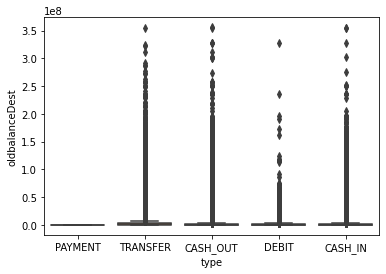

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


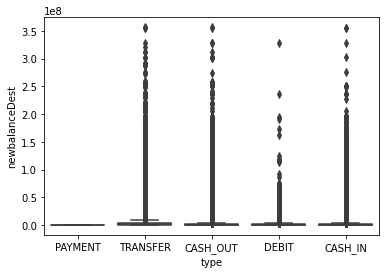

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


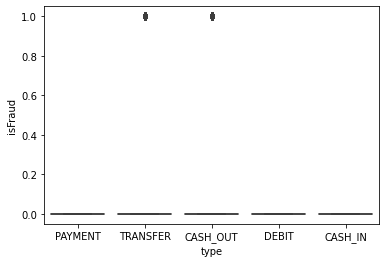

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


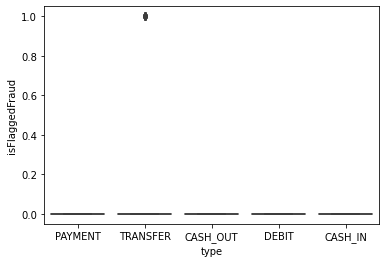

In [28]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["type"], data[data.columns[i]]))

Multivariant Analysis

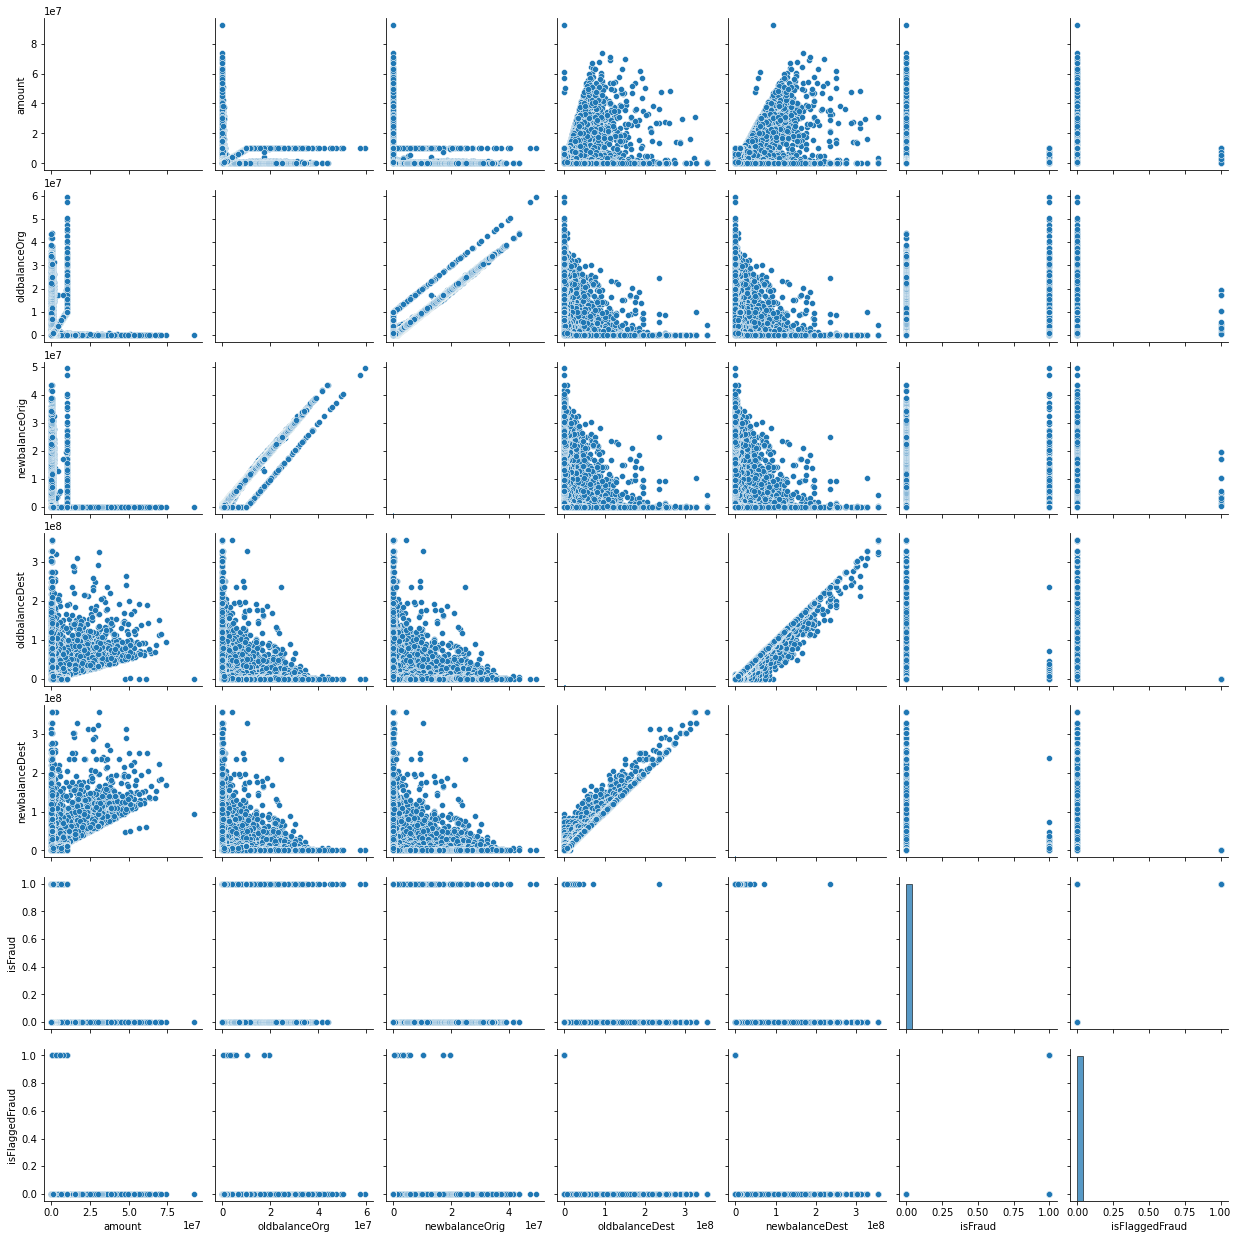

In [29]:
sns.pairplot(data)

In [30]:
data.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

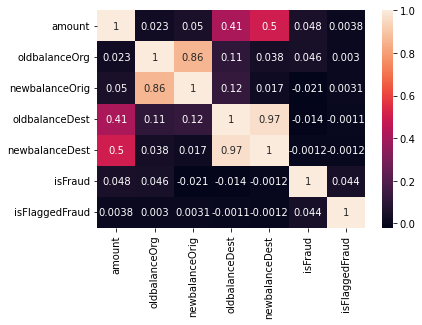

In [81]:
sns.heatmap(data.corr(), annot=True)

# Feature Transformation

Outlier Detection

In [31]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


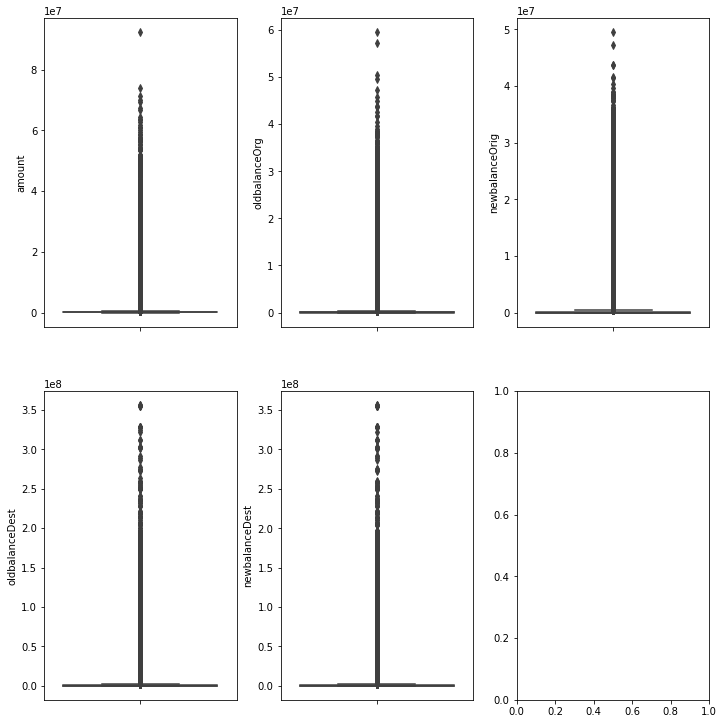

In [32]:
data1 = data.drop(columns=["type", "isFraud", "isFlaggedFraud"], axis=1)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [33]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        print(f'{data.columns[i]} : {data[data.columns[i]].skew()}')

amount : 30.99394948249038

oldbalanceOrg : 5.249136420603121

newbalanceOrig : 5.176884001159233

oldbalanceDest : 19.921757915791062

newbalanceDest : 19.352302057660165

isFraud : 27.779538153063452

isFlaggedFraud : 630.6036294703543


In [34]:
# CAPPING OUTLIERS

# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

def outlier_removal(column_name):
    upper_limit, lower_limit = column_name.quantile(0.75) + 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25)), column_name.quantile(0.75) - 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25))
    
    column_name = np.where(column_name > upper_limit,upper_limit,
                                              np.where(column_name < lower_limit,lower_limit,
                                              column_name))
    return column_name

In [35]:
data["amount"] = outlier_removal(data["amount"])
data["oldbalanceOrg"] = outlier_removal(data["oldbalanceOrg"])
data["newbalanceOrig"] = outlier_removal(data["newbalanceOrig"])
data["oldbalanceDest"] = outlier_removal(data["oldbalanceDest"])
data["newbalanceDest"] = outlier_removal(data["newbalanceDest"])

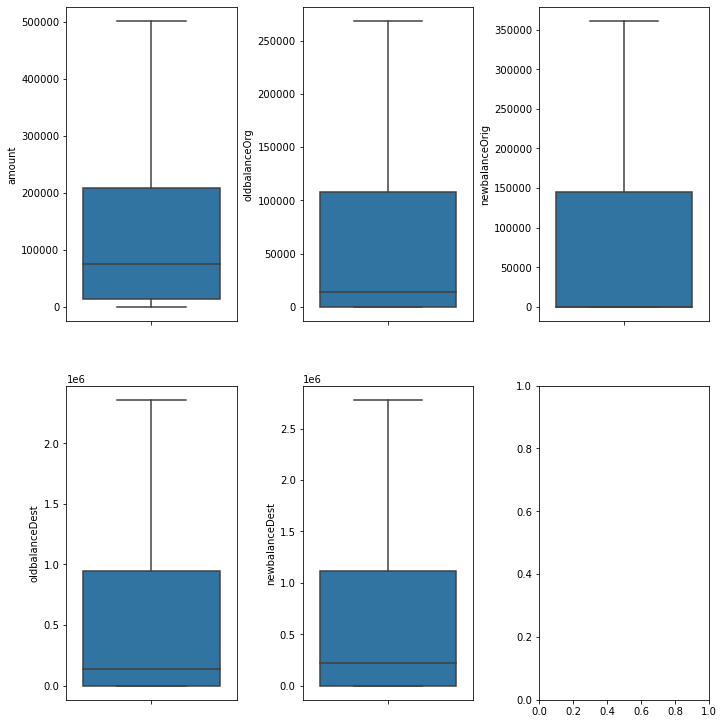

In [36]:
data1 = data.drop(columns=["type", "isFraud", "isFlaggedFraud"], axis=1)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [37]:
data.shape

(6362620, 8)

Handling Categorical Features

Feature Scaling - Normalization

In [38]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [39]:
x = data.drop(columns="isFraud")
y = data["isFraud"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
x_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
3204621,CASH_IN,408985.58,217416.00,360646.025,183636.38,0.00,0
2045176,PAYMENT,36343.91,83338.11,46994.200,0.00,0.00,0
538839,PAYMENT,18472.16,14333.52,0.000,0.00,0.00,0
1334320,CASH_OUT,233314.29,49039.00,0.000,435510.45,958137.78,0
4841852,PAYMENT,48630.31,0.00,0.000,0.00,0.00,0


In [41]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ["type"]),
    ("tnf2", MinMaxScaler(), ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])
], remainder="passthrough")

In [42]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [43]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.07789151, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.66454521, 0.51308064,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09834106, 0.03636512,
        0.        ]])

In [44]:
x_train.shape

(5090096, 10)

In [45]:
# Sampling the Data
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [46]:
from collections import Counter

counter = Counter
print("BEFORE :",counter(y_train))
print("AFTER :",counter(y_train_sm))

BEFORE : Counter({0: 5083482, 1: 6614})

AFTER : Counter({0: 5083482, 1: 5083482})


In [47]:
x_train_sm.shape

(10166964, 10)

# Model Building

**Logistic Regression**

In [48]:
logr = LogisticRegression()
model1 = logr.fit(x_train_sm,y_train_sm)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

93.20075692089108

In [49]:
score = []
for i in range(10):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    logr = LogisticRegression()
    logr.fit(x_train_sm,y_train_sm)
    pred = logr.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  6

99.99850690438844


In [50]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model1 = logr.fit(x_train_sm,y_train_sm)
pred1 = model1.predict(x_test)
accuracy_score(y_test, pred1)*100

99.99850690438844

In [51]:
# Training Data Accuracy

pred = model1.predict(x_train_sm)
accuracy_score(y_train_sm, pred)*100      #Generalized

99.998781945206

In [52]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod1 = cross_val_score(LogisticRegression(), x_train_sm, y_train_sm, cv=10)
print(mod1)
print(np.round(np.mean(mod1),2)*100)

[0.99999411 0.99998821 0.99998919 0.99998527 0.99998919 0.99998527

 0.99999018 0.99999018 0.99997839 0.99998821]

100.0


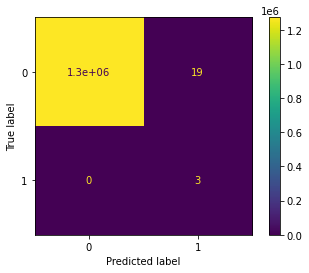

In [72]:
cm = confusion_matrix(y_test, pred1)
cm_display = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [97]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support



           0       1.00      1.00      1.00   1272521

           1       0.14      1.00      0.24         3



    accuracy                           1.00   1272524

   macro avg       0.57      1.00      0.62   1272524

weighted avg       1.00      1.00      1.00   1272524




**Decision Tree Classifier**

In [99]:
dtc = DecisionTreeClassifier()
model2 = dtc.fit(x_train_sm,y_train_sm)
pred2 = model2.predict(x_test)
accuracy_score(y_test, pred2)*100

99.99850690438844

In [100]:
for imp, name in sorted(zip(dtc.feature_importances_, data.drop(columns="isFraud").columns), reverse=True):
    print(f'{name} : {imp}')

isFlaggedFraud : 0.002533498438490829

oldbalanceDest : 3.7676957710538605e-07

type : 0.0

oldbalanceOrg : 0.0

newbalanceOrig : 0.0

newbalanceDest : 0.0

amount : 0.0


In [101]:
j = data[["isFlaggedFraud", "oldbalanceDest","isFraud"]]
k = data["isFraud"]

x_trainj, x_testj, y_trainj, y_testj = train_test_split(j, k, test_size=0.2, random_state=2)

# x_trainj = transformer.fit_transform(x_trainj)
# x_testj = transformer.transform(x_testj)

smote = SMOTE(sampling_strategy="minority")
x_train_smj, y_train_smj = smote.fit_resample(x_trainj,y_trainj)

dtc = DecisionTreeClassifier()
modelj = dtc.fit(x_train_smj,y_train_smj)
predj = modelj.predict(x_testj)
accuracy_score(y_test, predj)*100

99.87410846475194

In [56]:
# Training Data Accuracy

pred = model2.predict(x_train_sm)
accuracy_score(y_train_sm, pred)*100      #Generalized

99.99882123729613

In [57]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod2 = cross_val_score(DecisionTreeClassifier(random_state=4), x_train_sm, y_train_sm, cv=5)
print(mod2)
print(np.round(np.mean(mod2),2)*100)

[0.99999165 0.99998723 0.99998723 0.99999018 0.99998379]

100.0


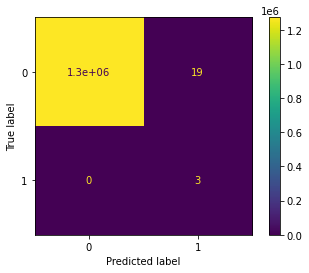

In [74]:
cm = confusion_matrix(y_test, pred2)
cm_display = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [96]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support



           0       1.00      1.00      1.00   1272521

           1       0.14      1.00      0.24         3



    accuracy                           1.00   1272524

   macro avg       0.57      1.00      0.62   1272524

weighted avg       1.00      1.00      1.00   1272524




1. The dataset does not contain any missing/null values. There were Outliers seen in columns such as amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest after visualisation with Boxplot. As there were large number of Outlier present so droping them may loss important information so I capped the Outliers witin the range(upper limit - lower limit) as boxplot functions. Most of the columns were having high correlation but the model accuracy observation after and before removing of those columns remains the same that is no variations. 
2. I would be chossing the Decision Tree model for the fraud detection. The precision and Recall for this model is 1 which means the model is generalized and with no bias to any single class.
3. The important columns to be taken can be isFlaggedFraud, oldbalanceDest after using the feature_importance_ function of decision tree. After post and pre removing of these columns there is no effect in model performance.
4. The accuracy score matrix gives the model performance of 99.87, the confusion matrix provides the TruePositive, FalseNegative, FalsePositive, FalseNegative and the Classification report gives the Precision, Recall and F1score.
5. The Data was Unbalnced as it contained only 1's ->82130 and 0's ->6354407 which can defintely make the model bias towards a sing class so to avoid that SMOTE is used to balance the dataset to make it more genralized.
